>> 和 <<都是位元運算，對二進位數值做移位操作。
<< 是左移，末位補0，類比十進制數在末尾添0相當於原數乘以10，
x<<z 是將x之二進位表示左移z位最右邊再補z個0，相當於原數x乘2的z次方。
x<<1 是將x之二進位表示左移一位，相當於原數x乘2。
例如整數4在二進位下是100，4<<1左移1位變成1000(二進位)，結果是8。
>>是右移，右移1位相當於除以2。

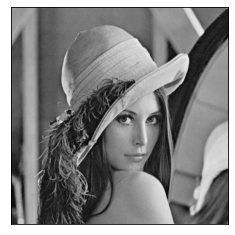

(400, 400)


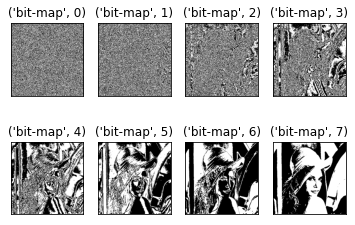

In [2]:
#Split a gray image into 8 bit maps
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('lena_color.jpg', 0) #取灰階圖
plt.imshow(image,'gray')
plt.xticks([]),plt.yticks([])
plt.show()

print(image.shape)
height, width = image.shape
bit_map = [np.zeros((height, width), dtype=int) for _ in range(8)]

for i in range(8):
    for j in range(height):
        for k in range(width):
            if image[j,k]&(1<<i):
                bit_map[i][j,k] = 1

for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(bit_map[i]*255,'gray')
    title = ('bit-map', i)
    plt.title(title)
    plt.xticks([]),plt.yticks([])
plt.show()

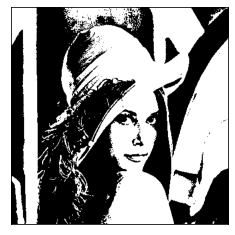

In [4]:
plt.imshow(bit_map[7]*255,'gray')
plt.xticks([]),plt.yticks([])
plt.show()

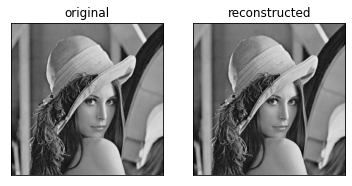

In [5]:
#sum up 8 bitmaps
sum_image = np.zeros((height, width), dtype=int)

for i in range(8):
    sum_image += bit_map[i]*2**i

images = [image, sum_image]
titles = ['original','reconstructed']
for i in range(2):
    plt.subplot(1,2,i+1)                    
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show() 

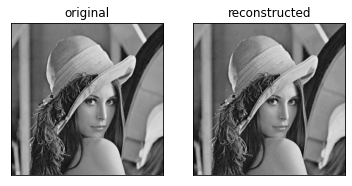

In [6]:
#sum up 5 bitmaps
sum_image = np.zeros((height, width), dtype=int)

for i in range(5):
    sum_image += bit_map[i+3]*2**(i+3)

images = [image, sum_image]
titles = ['original','reconstructed']
for i in range(2):
    plt.subplot(1,2,i+1)                    
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show() 

(([], []), ([], []))

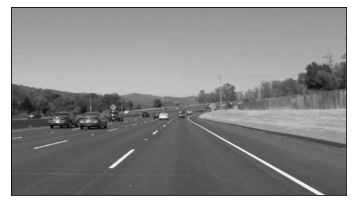

In [8]:
image_2 = cv2.imread('highway.jpg', 0) #取灰階圖   
plt.imshow(image_2,'gray')
plt.xticks([]),plt.yticks([])

shape of original image =  (540, 960)
shape of watermark =  (400, 400)


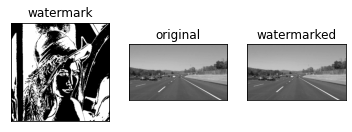

In [11]:
#Want to hide bit_map_image[6] into an image 'maple.jpg'
image_2 = cv2.imread('highway.jpg', 0) #取灰階圖   

print('shape of original image = ', image_2.shape)
h, w = image_2.shape
watermark = bit_map[6]
hh, ww = watermark.shape
watermarked_image = image_2.copy()
print('shape of watermark = ', watermark.shape)

for j in range(hh):
    for k in range(ww):
        #若watermark[j,k] == 1, 則改變watermarked_image[j,k]之bit 1 之值 (0變成1, 1變成0)
        if watermark[j,k] == 1:
            if image_2[j,k]&(1<<0): #看第一個bit(bit 1)是否為1
                watermarked_image[j,k] -= 1 #1變0
            else:
                watermarked_image[j,k] += 1 #0變1
          
images = [watermark, image_2, watermarked_image]
titles = ['watermark','original','watermarked']
for i in range(3):
    plt.subplot(1,3,i+1)                    
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [12]:
#Extract watermark, 假設不知watermark尺寸
extracted_watermark = np.zeros((h, w), dtype=int)
for j in range(h):
    for k in range(w):
        #若watermarked_image[j,k] != image_2[j,k], 
        #則將extracted_watermark[j,k]記錄為2**(i-1)
        if watermarked_image[j,k] != image_2[j,k]:
            extracted_watermark[j,k] = 255 

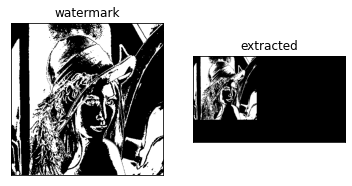

In [13]:
images = [watermark, extracted_watermark]
titles = ['watermark','extracted']
for i in range(2):
    plt.subplot(1,2,i+1)                    
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [14]:
#Extract watermark, 假設已知watermark尺寸
extracted_watermark = np.zeros((hh, ww), dtype=int)
for j in range(hh):
    for k in range(ww):
        #若watermarked_image[j,k] != image_2[j,k], 
        #則將extracted_watermark[j,k]記錄為2**(i-1)
        if watermarked_image[j,k] != image_2[j,k]:
            extracted_watermark[j,k] = 255 

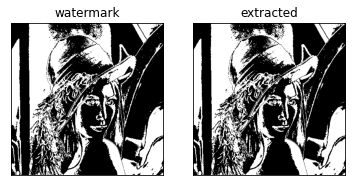

In [15]:
images = [watermark, extracted_watermark]
titles = ['watermark','extracted']
for i in range(2):
    plt.subplot(1,2,i+1)                    
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
前述的隱像術也可以用來隱藏任何可以用位元表示的資料,比如一段編完碼的文章

前述的隱像術(image hiding)之優缺點為何? 
優點: 植入容易
缺點: 取出困難.
     利用位元平面來植入影像的最大缺點為：一旦經過壓縮後，所植入的影像很容易受到破壞，解壓後所取出的影像常常已遭到破損。